# Programming Practice II
## 1 Overview
In this practice, you are asked to implement a neural network with one hidden layer for regression using NumPy only. In particular, you are expected to learn to
* implement simple activation functions;
* get familiar with gradient descent algorithms;
* get familiar with back-propagation algorithms in neural networks.

## 2 Tasks
In this section, you can start the programming practice task by task. Please pay attention to the hints as well as the API documents available online.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 2.1 Define Sigmoid Function

In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [ ]:
x = np.array([1,1])

In [ ]:
sigmoid(x)

array([0.73105858, 0.73105858])

### 2.2 Define Derivative of Sigmoid Function

In [ ]:
def derivative_sigmoid(x):
    # return (1+np.exp(-x))**(-2) * np.exp(-x)
    return (1-sigmoid(x)) * sigmoid(x)

In [ ]:
derivative_sigmoid(x)

array([0.19661193, 0.19661193])

### 2.3 Plot Functions

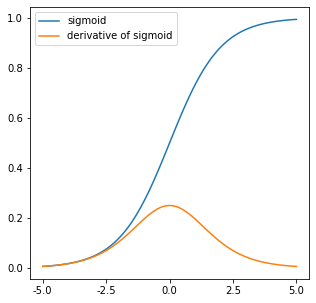

In [ ]:
plt.figure(figsize=(5,5))
plt.xticks(ticks=np.linspace(-5,5,5),labels=np.linspace(-5,5,5))
x = np.linspace(-5,5,100)
y = sigmoid(x)
y_derivative = derivative_sigmoid(x)
plt.plot(x,y,label='sigmoid')
plt.plot(x,y_derivative,label='derivative of sigmoid')
plt.legend()
plt.show()

### 2.4 Define Neural Network

In [ ]:
def forward_pass(x, w1, b1, w2, b2):
    y1 = sigmoid(w1@x + b1)
    y2 = w2@y1 + b2
    return y2

In [ ]:
random_state = np.random.RandomState(42)
a = random_state.randint(0,10,size=(2,3))
b = np.ones((3,4))
print(a@b)

[[16. 16. 16. 16.]
 [19. 19. 19. 19.]]


### 2.5 Define Loss Function

In [ ]:
def mse(y_true, y_pred):
    # return 0.5*np.linalg.norm(y_true - y_pred,'fro')**2
    return 0.5*np.sum((y_true - y_pred)**2) # for single loss

def derivative_mse(y_true, y_pred):
    return np.sum(y_pred - y_true, axis=0) 

### 2.6 Define Gradient

In [ ]:
# L         1x1
# y_hat     1x100
# b2        1x1
# w2        1x500
# b1        500x1
# w1        500x1
# X         1x100
# y1        500x100

In [ ]:
def print_shape(var, locals=locals()):
  pname = lambda v, names: [k for k in names if names[k] is v]
  print(f'{pname(var,locals)} shape {var.shape}')

In [ ]:
aa = np.array([1])
print_shape(aa)

['aa'] shape (1,)


In [ ]:
# calculate gradient based on forward_pass y_hat = w2*y1 + b2 = w2*sigmoid(w1*x + b1) + b2
def cal_gradient(x, y, y_hat, w1, b1, w2, b2):
    dLdy_hat = derivative_mse(y, y_hat).reshape((1,-1))               
    # print_shape(dLdy_hat, locals())
    dLdb2 = np.mean(dLdy_hat,axis=1).reshape((1,1))                          
    
    a1 = w1@x + b1
    # print_shape(a1, locals())
    
    y1 = sigmoid(a1)
    dLdw2 = np.mean(dLdy_hat * y1, axis=1).reshape(1,-1)
    # print_shape(dLdw2, locals())
    
    dLdy1 = dLdy_hat.T @ w2
    # print_shape(dLdy1, locals())
    
    dLdw1 = dLdy1.T * derivative_sigmoid(a1) * x                        # 500x1
    dLdw1 = np.mean(dLdw1, axis=1).reshape((-1,1))
    # print_shape(dLdw1, locals())
    
    dLdb1 = dLdy1.T * derivative_sigmoid(a1) * 1                        # 500x1
    dLdb1 = np.mean(dLdb1, axis=1).reshape((-1,1))
    # print_shape(dLdb1, locals())
    return dLdw1, dLdb1, dLdw2, dLdb2

### 2.7 Update Weights

In [ ]:
def update_parameters(parameters, gradient, learning_rate):
    return parameters - learning_rate * gradient

### 2.8 Train Network

In [ ]:
np.random.seed(42)
# datasets
def create_toy_dataset(n_samples=100):
  X = np.linspace(-1,1,num=n_samples)
  Y = 0.1*X + X**2 + X**3
  return X, Y

class dataset():
  def __init__(self, n):
    self.n_samples = n
    self.X = []
    self.Y = []
  def load_data(self):
    self.X, self.Y = create_toy_dataset(self.n_samples)
    return self.X, self.Y

mdata = dataset(100)
X,y = mdata.load_data()
indx = np.random.permutation(range(100))
X,y = X[indx],y[indx]
mini_batch_size = 10
X_, y_ = X.reshape((mini_batch_size,1,-1)), y.reshape((mini_batch_size,1,-1)) # create 10 mini-batch for accelerating training
print_shape(X,locals())
print_shape(y,locals())

# hyperparameters
learning_rate = 0.01
num_hidden_layers = 500
epochs = 5000

# parameter initialization
w1 = np.random.normal(size=(num_hidden_layers, 1))
b1 = np.zeros((500,1))
w2 = np.random.normal(size=(1,num_hidden_layers))
b2 = np.zeros((1,1))

from time import time
loss_log = []
# training
start = time()
for epoch in range(epochs+1):
  # train the mini-batch in one epoch
  loss = 0
  for X,y in zip(X_,y_):
    y_hat = forward_pass(X,w1,b1,w2,b2)
    gradient = cal_gradient(X,y,y_hat,w1,b1,w2,b2)
    loss = 1/y.shape[1]*(mse(y, y_hat))  # the loss over mini-batch
    
    w1 = update_parameters(w1,gradient[0],learning_rate)
    b1 = update_parameters(b1,gradient[1],learning_rate)
    w2 = update_parameters(w2,gradient[2],learning_rate)
    b2 = update_parameters(b2,gradient[3],learning_rate)

  loss_log.append(loss)
  if (epoch % 500 == 0):
     print(f'epoch {epoch} loss: {loss}')
end = time()
print(f'training time is {end - start}') 
# CPU: 67s, GPU: 68s, TPU: 62s in one batch
# CPU: 47s for 10 mini-batch 

['X'] shape (100,)
['y'] shape (100,)
epoch 0 loss: 0.008678109973923548
epoch 500 loss: 0.00065491266098862
epoch 1000 loss: 0.0005932462869786756
epoch 1500 loss: 0.0005446978637440619
epoch 2000 loss: 0.0005026979106918738
epoch 2500 loss: 0.00046661433370580053
epoch 3000 loss: 0.00043553853967253443
epoch 3500 loss: 0.0004086456865403215
epoch 4000 loss: 0.0003852441691585138
epoch 4500 loss: 0.00036476125890298153
epoch 5000 loss: 0.00034672312561073075
training time is 47.30865430831909


### conclusion
use suitable mini-batch to introduce some stochastic gradient descent compared with using whole batch at once, the loss improved from _0.0018_ to __0.00034__ (improved __80%__), the training time has also decreased from _68s_ to __47s__

### 2.9 Plot Results

['X'] shape (1, 1000)
['y_pred'] shape (1, 1000)


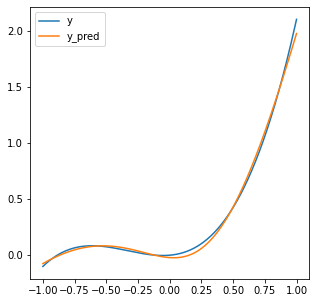

In [ ]:
# plotting for comparison between the prediction and ground truth
mdata = dataset(1000)
X,y = mdata.load_data()
X, y = X.reshape((1,-1)), y.reshape((1,-1))
plt.figure(figsize=(5,5))
y_pred = forward_pass(X,w1,b1,w2,b2)
print_shape(X)
print_shape(y_pred)
plt.plot(X[0,:],y[0,:],label='y')
plt.plot(X[0,:],y_pred[0,:],label='y_pred')
plt.legend()
plt.show()

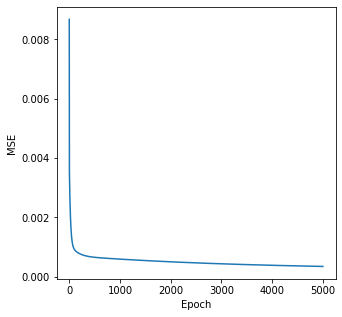

In [ ]:
# plotting for the loss
plt.figure(figsize=(5,5))
plt.plot(np.linspace(0,5000,5001),loss_log)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

### extra image processing


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

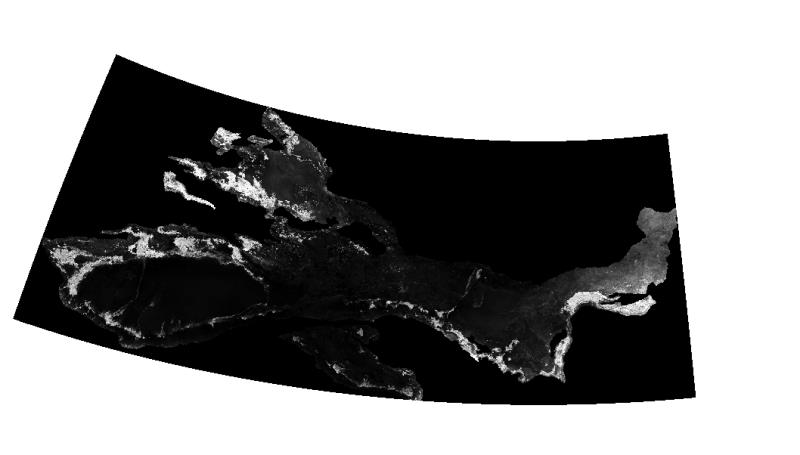

In [ ]:
img = cv2.imread('tophat.png', cv2.CV_8UC1)
cv2_imshow(img)

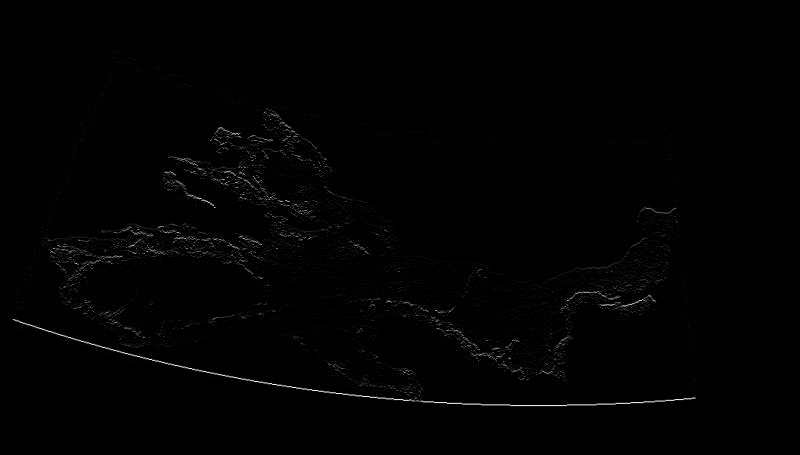

In [ ]:
img_ = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, (11,11))
cv2_imshow(img_)

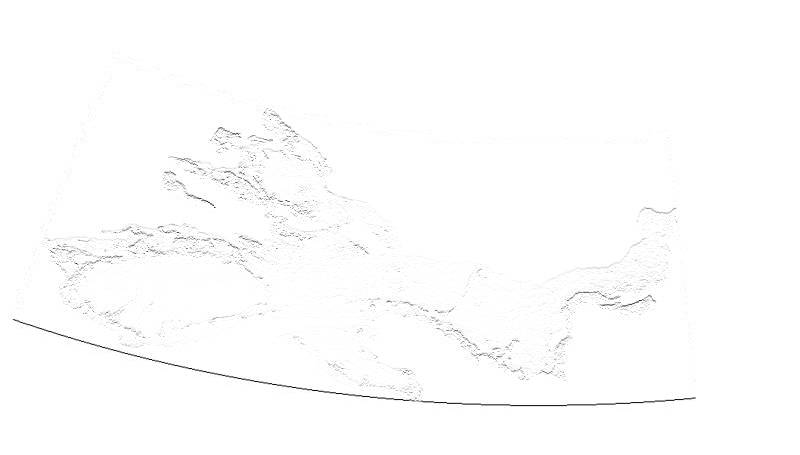

In [ ]:
img_out = cv2.bitwise_not(img_)
cv2_imshow(img_out)

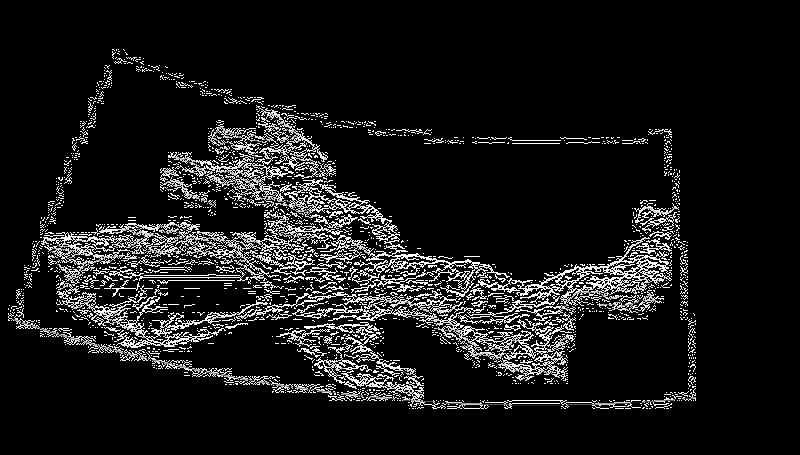

In [ ]:
kernel = np.ones((2,2),dtype=np.uint8)
img_dilation = cv2.dilate(img_out,kernel, iterations=1)
cv2_imshow(img_out - img_dilation)

(455, 800)


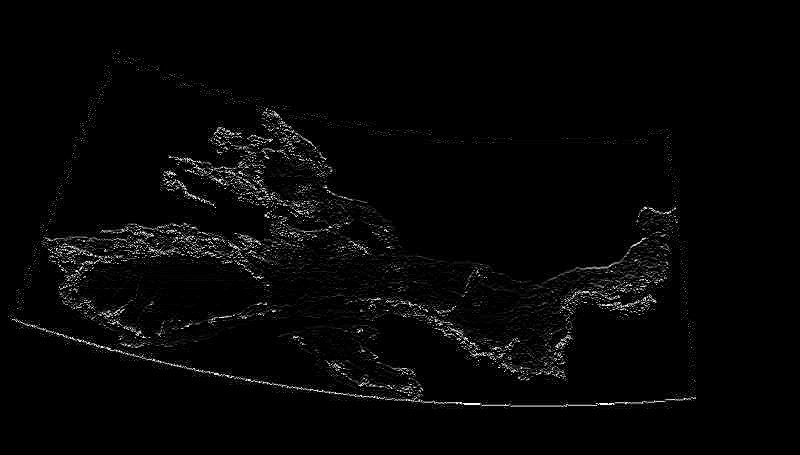

In [ ]:
# mask = 
print(img.shape)
res = cv2.bitwise_xor(img_out,255*np.ones(img.shape,dtype=np.uint8))
cv2_imshow(res*5)